In [7]:
from typing import List, Annotated
from typing_extensions import TypedDict

from langchain_groq.chat_models import ChatGroq
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph

from IPython.display import Image, display

from langchain_community.tools.tavily_search import TavilySearchResults
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.checkpoint.memory import MemorySaver

from dotenv import load_dotenv, find_dotenv

# Load environment variables from.env file
load_dotenv(find_dotenv(), override=True)

True

In [2]:
tool = TavilySearchResults(max_results=3)
tools = [tool]

In [3]:
class State(TypedDict):
    messages: Annotated[List, add_messages]

In [4]:
llm = ChatGroq(model="llama-3.1-70b-versatile",
                        stop_sequences="[end]")
llm_with_tools = llm.bind_tools(tools=tools)

def chatbot(state: State):
    return {'messages': [llm_with_tools.invoke(state["messages"])]}

In [8]:
graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=tools)
graph_builder.add_node("tools", tool_node)
graph_builder.add_conditional_edges("chatbot",
                                    tools_condition)

graph_builder.add_edge("tools", "chatbot")

graph_builder.set_entry_point("chatbot")
# graph_builder.set_finish_point("chatbot")

# Compile the graph
memory = SqliteSaver.from_conn_string(':memory:')
graph = graph_builder.compile(checkpointer=MemorySaver())

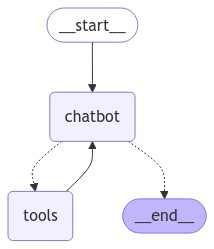

In [9]:
# visualize the graph
display(Image(graph.get_graph().draw_mermaid_png()))

In [11]:
config = {'configurable': {'thread_id': '1'}}

prompt = 'What is chatgpt? Tell me about it?'

# streaming the events. 
events = graph.stream(
    {'messages': [('user', prompt)]}, config, stream_mode='values'
)

for event in events:
    event['messages'][-1].pretty_print()

================================ Human Message =================================

What is chatgpt? Tell me about it?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_5xah)
 Call ID: call_5xah
  Args:
    query: What is ChatGPT
  tavily_search_results_json (call_7npm)
 Call ID: call_7npm
  Args:
    query: ChatGPT information
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.zdnet.com/article/how-does-chatgpt-work/", "content": "ChatGPT is an AI chatbot that can produce fully fleshed-out answers and results based on most of the world's digitally-accessible text-based information. Learn how it uses non-supervised pre-training and transformer architecture to parse queries and generate text."}, {"url": "https://openai.com/index/chatgpt/", "content": "ChatGPT is a model that interacts in a dialogue format and can answer followu

In [12]:
config = {'configurable': {'thread_id': '1'}}

prompt = 'Tell me about the latest version?'

# streaming the events. 
events = graph.stream(
    {'messages': [('user', prompt)]}, config, stream_mode='values'
)

for event in events:
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Tell me about the latest version?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_v0xc)
 Call ID: call_v0xc
  Args:
    query: ChatGPT latest version
  tavily_search_results_json (call_t3f5)
 Call ID: call_t3f5
  Args:
    query: ChatGPT updates
  tavily_search_results_json (call_3jy7)
 Call ID: call_3jy7
  Args:
    query: ChatGPT new features
================================= Tool Message =================================
Name: tavily_search_results_json

[{"url": "https://www.searchenginejournal.com/6-new-chatgpt-features-include-prompt-examples-file-uploads/493240/", "content": "6 New ChatGPT Features Include Prompt Examples & File Uploads\nWith GPT-4 as the new default, longer login duration, and suggested replies, these new ChatGPT features make AI even more user-friendly.\nOpenAI, the company behind the cutting-edge lan

In [13]:
config = {'configurable': {'thread_id': '1'}}

prompt = 'What were we talking about?'

# streaming the events. 
events = graph.stream(
    {'messages': [('user', prompt)]}, config, stream_mode='values'
)

for event in events:
    event['messages'][-1].pretty_print()

================================ Human Message =================================

What were we talking about?
================================== Ai Message ==================================

We were talking about ChatGPT, a model that interacts in a dialogue format and can answer follow-up questions, admit mistakes, and reject inappropriate requests. We discussed its latest version, GPT-4, and its new features, such as responding to images, providing recipe suggestions, and engaging in voice conversations.


In [14]:
config = {'configurable': {'thread_id': '2'}}

prompt = 'What were we talking about?'

# streaming the events. 
events = graph.stream(
    {'messages': [('user', prompt)]}, config, stream_mode='values'
)

for event in events:
    event['messages'][-1].pretty_print()

================================ Human Message =================================

What were we talking about?
================================== Ai Message ==================================

This conversation just started. We haven't discussed anything yet. What would you like to talk about?


In [18]:
config = {'configurable': {'thread_id': '1'}}
snapshot = graph.get_state(config)
print(snapshot)

StateSnapshot(values={'messages': [HumanMessage(content='What is chatgpt?', additional_kwargs={}, response_metadata={}, id='04b73a0c-a931-4763-bc57-0aeb4526d59e'), AIMessage(content='<function=tavily_search_results_json>{"query": "ChatGPT"}<function=tavily_search_results_json>\n\nPlease note that this is a general search query and the results may not provide a specific definition of ChatGPT. If you\'re looking for more specific information, you can try refining the query.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 284, 'total_tokens': 349, 'completion_time': 0.26, 'prompt_time': 0.050117376, 'queue_time': 0.0042197590000000035, 'total_time': 0.310117376}, 'model_name': 'llama-3.1-70b-versatile', 'system_fingerprint': 'fp_5c5d1b5cfb', 'finish_reason': 'stop', 'logprobs': None}, id='run-0ac2a646-50b1-4587-a3a9-a63030ee0316-0', usage_metadata={'input_tokens': 284, 'output_tokens': 65, 'total_tokens': 349}), HumanMessage(content='Wh